In [127]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math

from matrixoperations import *


#setup   
s = Helper.generateRandomBetween(-10,10)
perpframes = PerpFrames(s)
s = Helper.generateRandomBetween(-1.5,1.5)
perpframes2 = PerpFrames(s)

#get stretcher matrix
stretcher = Stretcher()
stretcher.setXYStretch(Helper.generateRandomBetween(2.2, 2.7), Helper.generateRandomBetween(.6, 1.6))
stretchMat = stretcher.getStretchMatrix()

#generate points
x = np.linspace( -math.pi, math.pi, 100)
 
circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val)
    circle.append(point)
circle = np.array(circle).transpose()

#draw a circle
plt.figure(figsize=(8,8))
plt.plot(circle[:,0], circle[:,1], 'ro', color = 'purple')

# #stretch the circle
stretched = stretchMat.dot(circle.transpose())
plt.plot(stretched[0,], stretched[1,], 'ro', color = 'blue')

#hang it
hung = perpframes2.hanger.dot(stretched)
plt.plot(hung[0,], hung[1,], 'ro', color = 'green')

#align it
aligned = perpframes.aligner.dot(stretched)
plt.plot(aligned[0,], aligned[1,], 'ro', color = 'orange')


#rescale graph to make sure x and y are the same height and width
ax = plt.gca()

lim = 0
if(max(plt.ylim() > max(plt.xlim()))):
	lim = max(plt.ylim())

#draw perp frames
def drawVector(ax, dim1, dim2, col = 'blue'):
    soa = np.array([[0, 0, dim1, dim2]])
    X, Y, U, V = zip(*soa)
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = col) 


#draw vecotrs
#curtosy of https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib
drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')
drawVector(ax, perpframes.hanger[0,0], perpframes.hanger[0,1], 'green')
drawVector(ax, perpframes.hanger[1,0], perpframes.hanger[1,1], 'green')


plt.draw()
ax.set_ylim(-1 * lim, lim)
ax.set_xlim(-1 * lim, lim)
#show the graph
plt.show()

ValueError: shapes (2,2) and (100,2) not aligned: 2 (dim 1) != 100 (dim 0)

In [222]:
A = perpframes2.hanger.dot(stretcher.getStretchMatrix().dot(perpframes.aligner))
print('Equality matrix')
print(stretcher.xstretch * perpframes2.hanger[0], "||", A.dot(perpframes.aligner[0]))
print(stretcher.ystretch * perpframes2.hanger[1], "||", A.dot(perpframes.aligner[1]))

Equality matrix
[-0.88464638 -1.09585091] || [-0.88464638  1.09585091]
[ 1.50788334 -1.21726736] || [-1.50788334 -1.21726736]


----------------------
Apply 
  [[ 1.40836374  0.        ]
 [ 0.          1.93789885]]  to 
 [[-0.51311081 -0.85832237]
 [ 0.85832237 -0.51311081]]
Got: 
[[-0.72264666 -1.20883011]
 [ 1.66334194 -0.99435685]]
Apply  [[-0.62813771 -0.77810219]
 [ 0.77810219 -0.62813771]]  to that.
Got  [[-0.84032838  1.53302302]
 [-1.60710075 -0.31600031]]


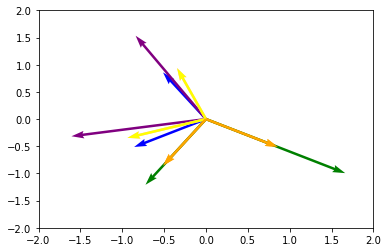

-0.513110809441


In [264]:
plt.gcf().clear() 
ax = plt.gca()

drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')
drawVector(ax, perpframes.hanger[0,0], perpframes.hanger[0,1], 'blue')
drawVector(ax, perpframes.hanger[1,0], perpframes.hanger[1,1], 'blue')

print("----------------------")
print("Apply \n " , stretcher.getStretchMatrix() , " to \n", perpframes.aligner)
print("Got: ")
print(stretcher.getStretchMatrix().dot(perpframes.aligner))
print("Apply ", perpframes2.hanger ," to that.")
print("Got ", A)
p = stretcher.getStretchMatrix().dot(perpframes.aligner)
drawVector(ax, p[0,0], p[0,1], 'green')
drawVector(ax, p[1,0], p[1,1], 'green')
p = A
drawVector(ax, p[0,0], p[0,1], 'purple')
drawVector(ax, p[1,0], p[1,1], 'purple')

p = perpframes2.hanger.dot(perpframes.aligner)
drawVector(ax, p[0,0], p[0,1], 'pink')
drawVector(ax, p[1,0], p[1,1], 'pink')

p = perpframes.aligner.dot(perpframes2.hanger)
drawVector(ax, p[0,0], p[0,1], 'yellow')
drawVector(ax, p[1,0], p[1,1], 'yellow')

drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')
lim = 0
if(max(plt.ylim() > max(plt.xlim()))):
	lim = max(plt.ylim())

plt.draw()
ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
plt.show()

print(perpframes.aligner[0,0])

C is  -------------
[[-0.37994747 -0.92500807]
 [ 0.92500807 -0.37994747]]
C is  -------------
[[ 0.5  0. ]
 [ 0.   1. ]]
[[0 1]
 [1 0]]
[[ 0.   0.5]
 [ 1.   0. ]]


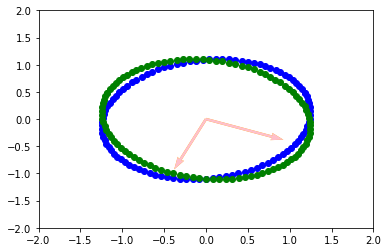

In [435]:
arr = np.array([[.5,0],[0,1]])
arr2 = np.array([[0,1],[1,0]])

B = np.array([[1,0], [0,1]])

plt.gcf().clear() 
ax = plt.gca()
# drawVector(ax, 0, 1, 'orange')
drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')

C = B.dot(perpframes.aligner)
print("C is " , "-------------")
print(C)
print("C is " , "-------------")

drawVector(ax, C[0,0], C[0,1], 'pink')
drawVector(ax, C[1,0], C[1,1], 'pink')

stretched = stretchMat.dot(circle.transpose())
A = perpframes.aligner.dot(stretched)
plt.plot(A[0,], A[1,], 'ro', color = 'blue')


A = perpframes.hanger.dot(stretched)
plt.plot(A[0,], A[1,], 'ro', color = 'green')

#print(A)
# drawVector(ax, arr2[0,0], arr2[0,1], 'green')
# drawVector(ax, arr2[1,0], arr2[1,1], 'green')

arr3 =arr.dot(arr2)
print(arr)
print(arr2)
print(arr3)

# drawVector(ax, arr3[0, 0], arr3[0,1], 'purple')
# drawVector(ax, arr3[1, 0], arr3[1,1], 'purple')


plt.draw()
ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
plt.show()


### G.3
Here's a curve shown together with a perpendicular frame:


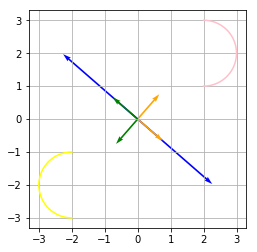

In [121]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math

from matrixoperations import *
ax = plt.gca()
#setup   
s = Helper.generateRandomBetween(-10,10)
perpframes = PerpFrames(s)
s = Helper.generateRandomBetween(-1.5,1.5)
perpframes2 = PerpFrames(s)

#get stretcher matrix
stretcher = Stretcher()
stretcher.setXYStretch(1, 1)
stretchMat = stretcher.getStretchMatrix()

lim = 0
if(max(plt.ylim() > max(plt.xlim()))):
	lim = max(plt.ylim())

x = np.linspace(0, math.pi, 1000)


circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val, xorigin = 2, yorigin = 2)
    circle.append(point)
line = np.array(circle).transpose()


# drawVector(ax, 0, 1, 'orange')
Helper.drawVector(ax, 3 * perpframes.aligner[0,0], 3 * perpframes.aligner[0,1], 'blue')
Helper.drawVector(ax, - 3 * perpframes.aligner[0,0],-3* perpframes.aligner[0,1], 'blue')

Helper.drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
Helper.drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')

# create an inverted perp frame
pa = -1 * perpframes.aligner
Helper.drawVector(ax, pa[0,0], pa[0,1], 'green')
Helper.drawVector(ax, pa[1,0], pa[1,1], 'green')

plt.plot(line[0,], line[1,],  color = 'pink')

A = perpframes.aligner.dot(stretchMat.dot(pa.transpose())) 
line = A.dot(line)
plt.plot(line[0,], line[1,],  color = 'yellow')

plt.draw()

ax.set_aspect('equal')
ax.grid(True, which='both')
#show the graph

plt.show()

The results of this cell show a reflection across the perpindecular frame in both the x and y direction. If we want to demonstrate no inversion in one particular axis, we will have to set a part of the perp frame = 0.

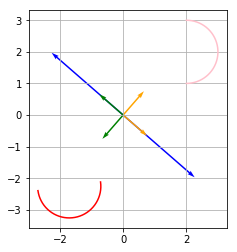

In [124]:
ax = plt.gca()
#setup   

x = np.linspace(0, math.pi, 1000)

circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val, xorigin = 2, yorigin = 2)
    circle.append(point)
line = np.array(circle).transpose()

Helper.drawVector(ax, 3 * perpframes.aligner[0,0], 3 * perpframes.aligner[0,1], 'blue')
Helper.drawVector(ax, - 3 * perpframes.aligner[0,0],-3* perpframes.aligner[0,1], 'blue')

Helper.drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
Helper.drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')

Helper.drawVector(ax, pa[0,0], pa[0,1], 'green')
Helper.drawVector(ax, pa[1,0], pa[1,1], 'green')

plt.plot(line[0,], line[1,],  color = 'pink')

hanger = perpframes.hanger
inverted_aligner = np.array([perpframes.aligner[0], -1 * perpframes.aligner[1]])
#inverted across hanger

hanger = inverted_aligner.transpose()
A = hanger.dot(stretchMat.dot(perpframes.aligner))

line = A.dot(line)
plt.plot(line[0,], line[1,],  color = 'red')
plt.draw()

ax.set_aspect('equal')
ax.grid(True, which='both')
#show the graph

plt.show()

If we want to invert specifically over the first perpframe, we must first multiply perpframe[1] (which is 2) by -1. Then we do the same hanger.stretcher.aligner (in this case the stretcher is 1) to create the appropriate transform. 

The most important line is `inverted_aligner = np.array([perpframes.aligner[0], -1 * perpframes.aligner[1]])` which is the line to create the inverted aligner. This is what will eventually be the hung perp frame.

There is another way of creating this effect. If you use the ystretch factor and multiply it by -1, then you would be able to accomplish the same task. 